In [168]:
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [170]:
df.head(4)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910


In [171]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [172]:
df.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [173]:
df.shape

(92016, 5)

In [174]:
df.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [175]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [176]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ]) #convert column to datetime 


In [177]:
df=df.resample('D', on='FullDate').sum()
df.head(3)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38,88.56,2751.700
2010-09-02,369.6,38898.99,88.56,570.810
2010-09-03,439.2,41665.76,106.80,504.975


In [178]:
df=df.reset_index()
df.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [179]:
from statsmodels.tsa.stattools import adfuller
import numpy

In [180]:
a=df['SysLoad'].values

In [181]:
r=adfuller(a, autolag='AIC')
print('p_value: %f' %r[1])

p_value: 0.004254


In [182]:
print('critical values:')
for key, value in r[4].items():
  print('\t%s: %.3f' %(key, value))

critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [183]:
b=df['GasPrice'].values

In [184]:
r_2=adfuller(b, autolag='AIC')
print('p_value: %f' %r_2[1])

p_value: 0.045027


In [185]:
print('critical values:')
for key, value in r_2[4].items():
  print('\t%s: %.3f' %(key, value))

critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [186]:
c=df['ElecPrice']

In [187]:

df_1=df[['FullDate', 'ElecPrice']]
df_new = df_1.rename(columns={ 'FullDate' : 'ds' , 'ElecPrice' : 'y' }) 
df_new.head() 


,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [188]:
train=df_new[:2757]
test=df_new[2757:]
print('length of train is:{}'.format (len(train)), 'length of test is:{}'.format (len(test)))

length of train is:2757 length of test is:1077


In [189]:
from prophet import Prophet

In [190]:
model = Prophet() 
model.fit(train) 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ow1qumz/l32rgx5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ow1qumz/_41dy3xo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89788', 'data', 'file=/tmp/tmp8ow1qumz/l32rgx5m.json', 'init=/tmp/tmp8ow1qumz/_41dy3xo.json', 'output', 'file=/tmp/tmp8ow1qumz/prophet_model8aae3s4b/prophet_model-20230131003410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:34:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:34:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [191]:
future = model.make_future_dataframe(periods=len(test) ) 
forecast = model.predict(future) 
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,992.737122,-1441.196509,3443.109065,848.802868,848.802868,848.802868
1,2010-09-02,1072.990968,-1360.154679,3290.396850,848.765391,848.765391,848.765391
2,2010-09-03,847.919300,-1499.137815,3238.341480,848.727914,848.727914,848.727914
3,2010-09-04,507.564481,-1928.817659,2778.657261,848.690437,848.690437,848.690437
4,2010-09-05,417.549684,-1909.151511,2747.787509,848.652960,848.652960,848.652960
...,...,...,...,...,...,...,...
3829,2021-02-24,3446.060747,268.651669,6350.961865,3535.688715,1917.654105,5131.706274
3830,2021-02-25,3512.928139,484.577168,6645.851542,3536.482672,1915.383400,5135.081350
3831,2021-02-26,3279.749616,429.106985,6031.059492,3537.276630,1913.188725,5138.456426
3832,2021-02-27,2936.426367,-231.011309,5910.535220,3538.070588,1911.124787,5141.831502


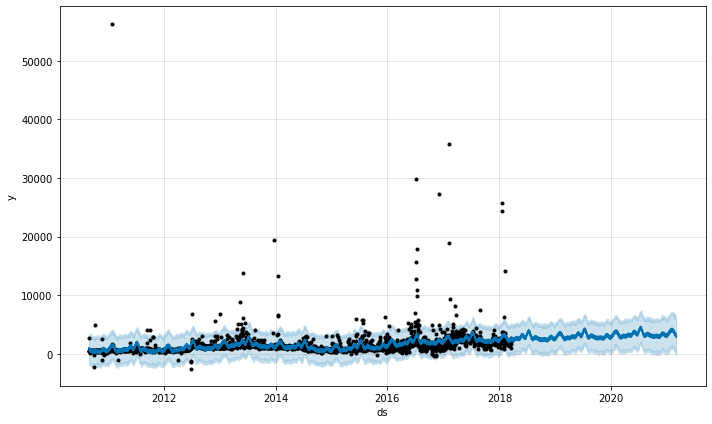

In [192]:
model.plot(forecast) 
plt.show()

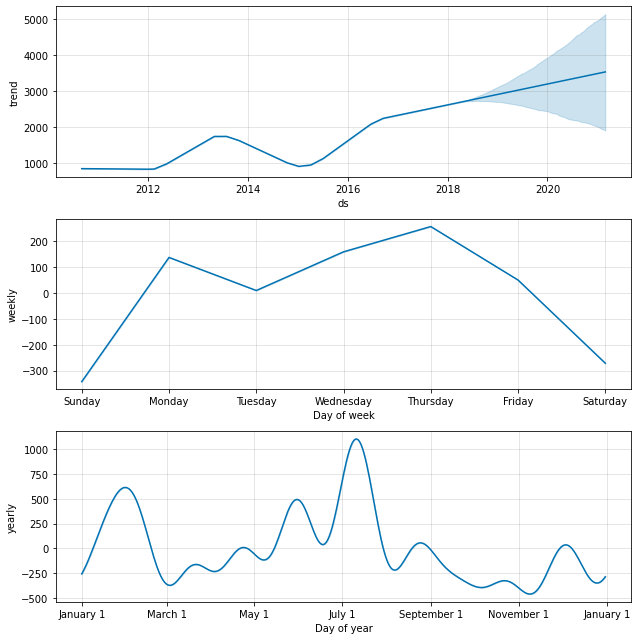

In [193]:
model.plot_components(forecast)
plt.show()

In [194]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
predictions=forecast[2757:]['yhat'].values
test_set=test['y'].values

In [195]:
mse=mean_squared_error(test_set, predictions)
print('mean_squared_error:{}'.format(mse))

mean_squared_error:10291665.047393445


In [196]:
mae=mean_absolute_error(test_set, predictions)
print('mean_absolute_error:{}'.format(mae))

mean_absolute_error:1731.9703063637687


In [197]:
mape=mean_absolute_percentage_error(test_set, predictions)
print(mape)

5.447254323999416


In [198]:
df.head(3)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [199]:
df_2 = df.rename(columns={ 'FullDate' : 'ds' , 'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3',  'ElecPrice' : 'y' }) 
df_2.head() 


,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [200]:
train_2=df_2[:2757]
test_2=df_2[2757:]
print('length of train is:{}'.format (len(train_2)), 'length of test is:{}'.format (len(test_2)))

length of train is:2757 length of test is:1077


In [201]:
m=Prophet()
m.fit(train_2[['ds', 'add2', 'add1', 'add3', 'y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ow1qumz/8zekw1il.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ow1qumz/kn2l1063.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9768', 'data', 'file=/tmp/tmp8ow1qumz/8zekw1il.json', 'init=/tmp/tmp8ow1qumz/kn2l1063.json', 'output', 'file=/tmp/tmp8ow1qumz/prophet_modelcrz7g_rq/prophet_model-20230131003414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:34:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [205]:
future_2 = m.make_future_dataframe(periods=len(test_2) ) 
forecast_2 = m.predict(future_2) 
forecast_2[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,992.737122,-1266.122081,3477.651775,848.802868,848.802868,848.802868
1,2010-09-02,1072.990968,-1486.114556,3485.661512,848.765391,848.765391,848.765391
2,2010-09-03,847.919300,-1360.396750,3305.297259,848.727914,848.727914,848.727914
3,2010-09-04,507.564481,-1818.215159,2950.246314,848.690437,848.690437,848.690437
4,2010-09-05,417.549684,-2010.113624,2835.611088,848.652960,848.652960,848.652960
...,...,...,...,...,...,...,...
3829,2021-02-24,3446.060747,523.153062,6446.517860,3535.688715,1816.764466,5259.238568
3830,2021-02-25,3512.928139,440.321107,6697.506648,3536.482672,1815.718212,5262.205008
3831,2021-02-26,3279.749616,288.783514,6269.146178,3537.276630,1814.671959,5265.171449
3832,2021-02-27,2936.426367,-25.694358,5890.120388,3538.070588,1813.625705,5268.137889


In [206]:
predictions_2=forecast_2[2757:]['yhat'].values
test_set_2=test_2['y'].values

In [207]:
mse_2=mean_squared_error(test_set_2, predictions_2)
print('mean_squared_error:{}'.format(mse_2))

mean_squared_error:10291665.047393445


In [208]:
mape_2=mean_absolute_percentage_error(test_set_2, predictions_2)
print(mape_2)

5.447254323999416


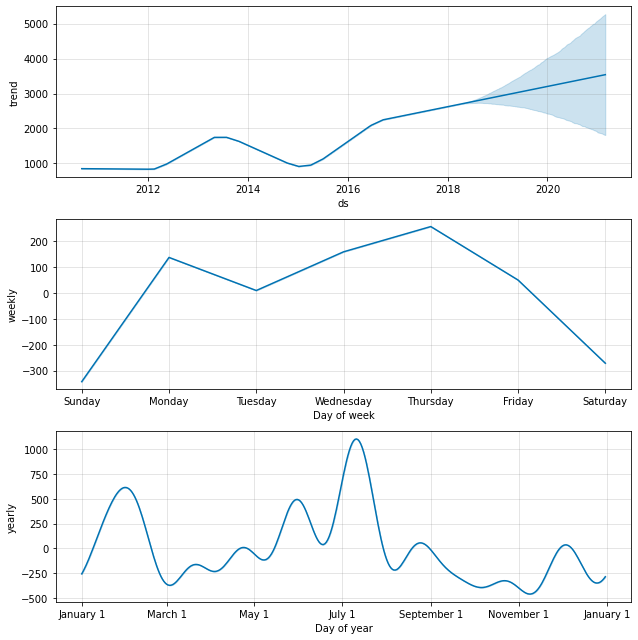

In [209]:
model.plot_components(forecast_2)
plt.show()